# Overfitting and Early Stopping

### Importing the libraries

In [1]:

import matplotlib.pyplot as plt
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, load_img



## Data Preprocessing

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
training_set = train_datagen.flow_from_directory('fruit_dataset/train',
                                                 target_size = (200, 200),
                                                 batch_size = 8,
                                                 class_mode = 'categorical')

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('fruit_dataset/test',
                                            target_size = (200, 200),
                                            batch_size = 8,
                                            class_mode = 'categorical')

In [ ]:
# Visualizing Training data
plt.imshow(load_img('fruit_dataset/train/apple/apple_1.jpg'))

## Building the CNN

### Dropout
Another technique to reduce overfitting is to introduce dropout regularization to the network.

When you apply dropout to a layer, it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

Let's create a new neural network with tf.keras.layers.Dropout before training it using the augmented images:

In [5]:
# Creating a Sequential model
# ** We can try to use 'tanh' activation in all the conv2D layers **
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', input_shape=(200,200,3,)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
model.add(Dropout(0.2)),
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [ ]:
# Model Summary
model.summary()

### Training the CNN on the Training set and evaluating it on the Test set


In [ ]:
from keras import callbacks
# This callback will stop the training when there is no improvement in
callback = callbacks.EarlyStopping(monitor='loss', patience=3)

# Training the model
history = model.fit(x = training_set, validation_data = test_set ,epochs=50, callbacks=[callback])

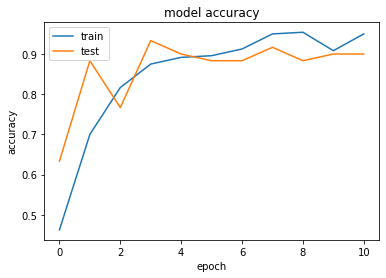

In [8]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

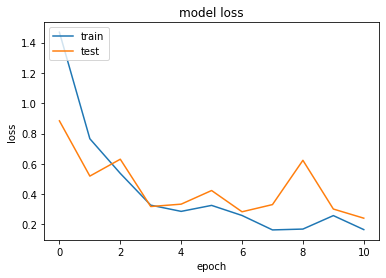

In [9]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
accuracy = round(history.history['acc'][-1], 2)
print(f'The model accuracy is: {accuracy}')

## Single Prediction


In [ ]:
in_classes = {y:x for x,y in training_set.class_indices.items()}
in_classes

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('fruit_dataset/test/orange/orange_77.jpg', target_size = (200, 200))
test_image = image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result = np.argmax(result)
print(in_classes[result])
